# Linearní regrese

$$
a_0 = \frac{1}{2}\sum_{i=1}^n{(y_i- \frac{a_1}{n})} \sum_{i=1}^n{x_i}
$$


$\overline{y}$ je průměr všech $y_i$

$$
a_1 = \frac{\sum_{i=1}^{n}{(y_i - \overline{y})}}{\sum_{i=1}^{n}{(x_i - \overline{x})}}
$$

In [135]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List

a1: -0.19520547945205483
a0: 4.982876712328768


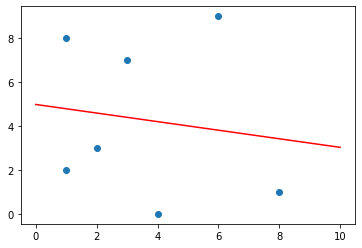

In [151]:


x = np.array([1, 2, 6, 4, 8, 3, 1])
y = np.array([2, 3, 9, 0, 1, 7, 8])
n = len(x)
plot_x = list(range(n))

mean_x = np.mean(x)
mean_y = np.mean(y)

variance_x = np.mean(x**2) - np.mean(x)**2
variance_y = np.mean(y**2) - np.mean(y)**2

covariance_x_y = np.sum((x-mean_x) * (y-mean_y)) / n

a1=covariance_x_y / variance_x
a0 = mean_y - a1 *  mean_x

prediction_x = np.linspace(-0,10,100)

plt.figure()
plt.scatter(x,y)

plt.plot(prediction_x, prediction_x*a1 + a0 , '-r')

print("a1:",a1)
print("a0:", a0)

## Střední hodnota

$$
\overline{X} = \frac{\sum{x_i}}{n} 
$$


In [152]:
def manual_mean(vector):
    return sum(vector) / len(vector)

mean_x_manual = manual_mean(x.tolist())
mean_y_manual = manual_mean(y.tolist())

print(f"np vs manual střední hodnoty X: {mean_x - mean_x_manual:e}")
print(f"np vs manual střední hodnoty Y: {mean_y - mean_y_manual:e}")

np vs manual střední hodnoty X: 0.000000e+00
np vs manual střední hodnoty Y: 0.000000e+00


střední hodnota X: 3.5714285714285716
střední hodnota Y: 4.285714285714286


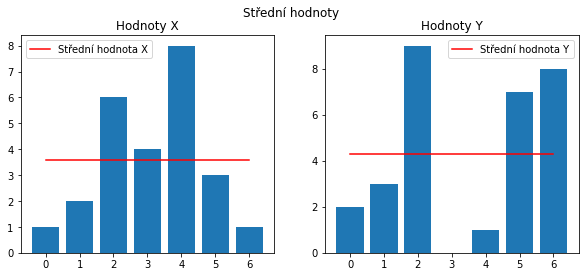

In [147]:
plt.figure(figsize=(10,4))
plt.suptitle("Střední hodnoty")

plt.subplot(1,2, 1)
plt.title("Hodnoty X")
plt.bar(range(len(x)),x)
plt.plot([mean_x for i in plot_x] ,'-r', label="Střední hodnota X")
plt.legend()

plt.subplot(1,2,2)
plt.title("Hodnoty Y")
plt.bar(range(len(y)),y)
plt.plot([mean_y for i in plot_x] ,'-r', label="Střední hodnota Y")
plt.legend()

print(f"střední hodnota X: {mean_x}")
print(f"střední hodnota Y: {mean_y}")

## Variance
$$
var(X) = E(X^2) - E(X)^2
$$

In [155]:
def manual_variance(vector):
    vector_pow_2 = [value**2 for value in vector]
    return manual_mean(vector_pow_2) - manual_mean(vector) ** 2

deviation_x = np.sqrt(variance_x)
deviation_y = np.sqrt(variance_y)

variance_x_manual = manual_variance(x.tolist())
variance_y_manual = manual_variance(y.tolist())

print(f"np vs manual variance X: {variance_x - variance_x_manual:e}")
print(f"np vs manual variance Y: {variance_y - variance_y_manual:e}")

np vs manual variance X: 0.000000e+00
np vs manual variance Y: 0.000000e+00


Variance X: 5.959183673469388
Variance Y: 11.346938775510207


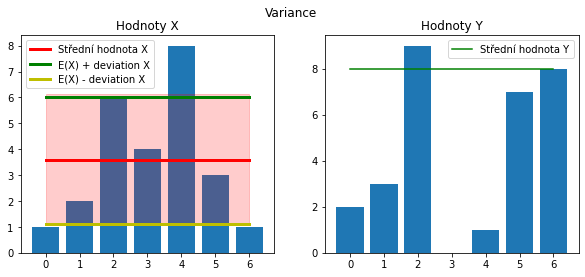

In [185]:
plt.figure(figsize=(10,4))
plt.suptitle("Variance")



plt.subplot(1,2, 1)
plt.title("Hodnoty X")
plt.bar(range(len(x)),x)

plt.plot([mean_x for i in plot_x] ,'-r', label="Střední hodnota X", linewidth=3)
 
plt.plot([mean_x + deviation_x for i in plot_x] ,'-g', label="E(X) + deviation X", linewidth=3)
plt.plot([mean_x - deviation_x for i in plot_x] ,'-y', label="E(X) - deviation X", linewidth=3)

rectangle = plt.Rectangle((0,mean_x-deviation_x),n-1, mean_x+deviation_x-1, color="red",alpha=0.2)
ax =  plt.gca()
ax.add_patch(rectangle)

plt.legend()

plt.subplot(1,2,2)
plt.title("Hodnoty Y")
plt.bar(range(len(y)),y)
plt.plot([variance_y - deviation_y for i in plot_x] ,'-g', label="Střední hodnota Y")
plt.legend()

print(f"Variance X: {variance_x}")
print(f"Variance Y: {variance_y}")
plt.show()

### Spočítání parametrů bez použití numpy

In [139]:
def manual_mean(vector):
    return sum(vector) / len(vector)


def manual_covariance(vector_x, vector_y):
    x_mean = manual_mean(vector_x)
    y_mean = manual_mean(vector_y)
    n = len(vector_x)

    vector_x_minus_x_mean = [value - x_mean for value in vector_x]
    vector_y_minus_y_mean = [value - y_mean for value in vector_y]

    x_y_multiply = [vector_x_minus_x_mean[i] *
                    vector_y_minus_y_mean[i] for i in range(n)]

    xy_sum = sum(x_y_multiply) / n
    return xy_sum

a1_manual = manual_covariance(x, y) / manual_variance(x)
a0_manual = manual_mean(y) - a1_manual * manual_mean(x)

print("a1 manual:", a1_manual)
print("a0 manual:", a0_manual)

print(f"a0 chyba oproti numpy: {a0 - a0_manual:e}")
print(f"a1 chyba oproti numpy {a1 - a1_manual:e}")

a1 manual: -0.19520547945205483
a0 manual: 4.982876712328768
a0 chyba oproti numpy: 0.000000e+00
a1 chyba oproti numpy 0.000000e+00


## Kovariance

$$
cov(X,Y) = \frac{\sum_{i=0}^{n}{(X_i - \overline{X})(Y_i-\overline{Y})}}{n}
$$

## Parametry
Můžeme to postupně zjednodušit do tvaru

$$
a_1 = \frac{cov(X,Y)}{var(X)}
$$

$$
a_0 = \overline{Y} - a_1\overline{X}
$$